<a href="https://colab.research.google.com/github/GFen2/Conv/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username": "gfen01","key": "211ea4597d79d6dfb391756234894fc1"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets list -s {"cats"}

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dogs                                        788MB  2020-03-12 05:34:30          39743        473  0.875            
chetankv/dogs-cats-images                                  Dogs & Cats Images                                  435MB  2018-04-19 18:20:08          38946        581  0.5625           
mmoreaux/audio-cats-and-dogs                               Audio Cats and Dogs                                  97MB  2017-10-05 09:40:26          13125        252  0.7647059        
biaiscience/dogs-vs-cats                                   Dogs vs Cats              

In [ ]:
!kaggle datasets download -d {Dogs & Cats Images} -p /content/kaggle/

/bin/bash: line 1: Cats: command not found
not enough values to unpack (expected 3, got 2)


In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 99% 778M/788M [00:13<00:00, 86.0MB/s]
100% 788M/788M [00:13<00:00, 60.7MB/s]


In [ ]:
! unzip microsoft-catsvsdogs-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/PetImages/Dog/550.jpg  
  inflating: train/PetImages/Dog/5500.jpg  
  inflating: train/PetImages/Dog/5501.jpg  
  inflating: train/PetImages/Dog/5502.jpg  
  inflating: train/PetImages/Dog/5503.jpg  
  inflating: train/PetImages/Dog/5504.jpg  
  inflating: train/PetImages/Dog/5505.jpg  
  inflating: train/PetImages/Dog/5506.jpg  
  inflating: train/PetImages/Dog/5507.jpg  
  inflating: train/PetImages/Dog/5508.jpg  
  inflating: train/PetImages/Dog/5509.jpg  
  inflating: train/PetImages/Dog/551.jpg  
  inflating: train/PetImages/Dog/5510.jpg  
  inflating: train/PetImages/Dog/5511.jpg  
  inflating: train/PetImages/Dog/5512.jpg  
  inflating: train/PetImages/Dog/5513.jpg  
  inflating: train/PetImages/Dog/5514.jpg  
  inflating: train/PetImages/Dog/5515.jpg  
  inflating: train/PetImages/Dog/5516.jpg  
  inflating: train/PetImages/Dog/5517.jpg  
  inflating: train/PetImages/Dog/5518.jpg  
  inflating: train/PetImage

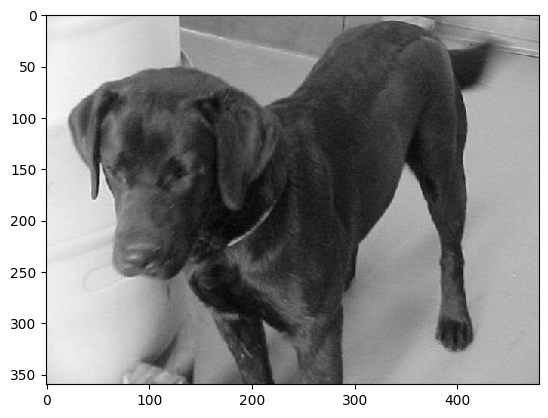

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR ="/content/train/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

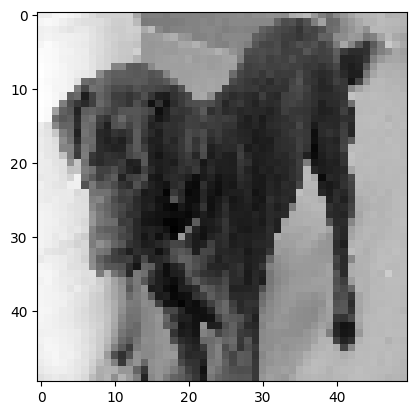

In [ ]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

100%|██████████| 12501/12501 [00:16<00:00, 756.65it/s]


24946
0
0
0
0
1
0
0
1
1
0
[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("/content/X.pickle", "rb"))
Y = pickle.load(open("/content/y.pickle", "rb"))

X = X/255.0 #normalize

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

X = np.array(X)
y = np.array(y)

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])
model.fit(X, y, batch_size = 32, epochs = 10, validation_split=0.1)

Epoch 1/10
702/702 [==============================] - 121s 170ms/step - loss: 0.6525 - accuracy: 0.6120 - val_loss: 0.6129 - val_accuracy: 0.6645
Epoch 2/10
702/702 [==============================] - 121s 172ms/step - loss: 0.5771 - accuracy: 0.6990 - val_loss: 0.5412 - val_accuracy: 0.7303
Epoch 3/10
318/702 [============>.................] - ETA: 1:02 - loss: 0.5229 - accuracy: 0.7421

KeyboardInterrupt: 